# 기말고사 예상문제
> 빅데이터분석특강

> 기말고사
- toc:false
- branch: master
- badges: true
- comments: true
- author: 심재인

## imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import tensorflow as tf 
import tensorflow.experimental.numpy as tnp

In [2]:
tnp.experimental_enable_numpy_behavior()

In [3]:
%load_ext tensorboard

In [4]:
import graphviz
def gv(s): return graphviz.Source('digraph G{ rankdir="LR"'+ s + ';}')

## 1. Fashion_mnist, DNN (30점)

`(1)` `tf.keras.datasets.fashion_mnist.load_data()`을 이용하여 fashion_mnist 자료를 불러온 뒤 아래의 네트워크를 이용하여 적합하라.

- 평가지표로 accuracy를 이용할 것 
- epoch은 10으로 설정할 것 
- optimizer는 adam을 이용할 것

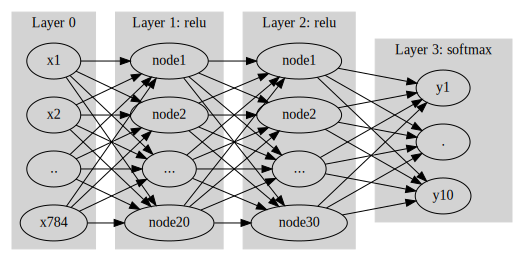

In [5]:
#collapse
gv('''
splines=line
subgraph cluster_1{
    style=filled;
    color=lightgrey;
    "x1"
    "x2"
    ".."
    "x784"
    label = "Layer 0"
}
subgraph cluster_2{
    style=filled;
    color=lightgrey;
    "x1" -> "node1"
    "x2" -> "node1"
    ".." -> "node1"
    "x784" -> "node1"
    
    "x1" -> "node2"
    "x2" -> "node2"
    ".." -> "node2"
    "x784" -> "node2"
    
    "x1" -> "..."
    "x2" -> "..."
    ".." -> "..."
    "x784" -> "..."

    "x1" -> "node20"
    "x2" -> "node20"
    ".." -> "node20"
    "x784" -> "node20"


    label = "Layer 1: relu"
}
subgraph cluster_3{
    style=filled;
    color=lightgrey;
    "node1" -> "node1 "
    "node2" -> "node1 "
    "..." -> "node1 "
    "node20" -> "node1 "
    
    "node1" -> "node2 "
    "node2" -> "node2 "
    "..." -> "node2 "
    "node20" -> "node2 "
    
    "node1" -> "... "
    "node2" -> "... "
    "..." -> "... "
    "node20" -> "... "

    "node1" -> "node30 "
    "node2" -> "node30 "
    "..." -> "node30 "
    "node20" -> "node30 "


    label = "Layer 2: relu"
}
subgraph cluster_4{
    style=filled;
    color=lightgrey;

    "node1 " -> "y10"
    "node2 " -> "y10"
    "... " -> "y10"
    "node30 " -> "y10"
    
    "node1 " -> "y1"
    "node2 " -> "y1"
    "... " -> "y1"
    "node30 " -> "y1"
    
    "node1 " -> "."
    "node2 " -> "."
    "... " -> "."
    "node30 " -> "."
    
    label = "Layer 3: softmax"
}
''')

In [10]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [11]:
X = tf.constant(x_train.reshape(-1,28,28,1),dtype=tf.float64)
y = tf.keras.utils.to_categorical(y_train)
XX = tf.constant(x_test.reshape(-1,28,28,1),dtype=tf.float64)
yy = tf.keras.utils.to_categorical(y_test)

In [12]:
tf.random.set_seed(4305)
net = tf.keras.Sequential()
net.add(tf.keras.layers.Flatten())
net.add(tf.keras.layers.Dense(20,activation='relu'))
net.add(tf.keras.layers.Dense(30,activation='relu'))
net.add(tf.keras.layers.Dense(10,activation='softmax'))
net.compile(loss=tf.losses.categorical_crossentropy, optimizer='adam',metrics=['accuracy'])
net.fit(X,y,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 1.5829 - accuracy: 0.5105
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.9581 - accuracy: 0.6048
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.9115 - accuracy: 0.6188
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.8911 - accuracy: 0.6262
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.8937 - accuracy: 0.6198
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.8745 - accuracy: 0.6296
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.8683 - accuracy: 0.6305
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.8586 - accuracy: 0.6331
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.8512 - accuracy: 0.6346
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.836

`(2)` (1)에서 적합된 네트워크를 이용하여 test data의 accuracy를 구하라.

In [13]:
net.evaluate(XX,yy)

313/313 [==============================] - 0s 1ms/step - loss: 0.9906 - accuracy: 0.6023


[0.9906449317932129, 0.6022999882698059]

`(3)` train set에서 20%의 자료를 validation 으로 분리하여 50에폭동안 학습하라. 텐서보드를 이용하여 train accuracy와 validation accuracy를 시각화 하고 결과를 해석하라. 오버피팅이라고 볼 수 있는가?

In [14]:
tf.random.set_seed(4305)
net = tf.keras.Sequential()
net.add(tf.keras.layers.Flatten())
net.add(tf.keras.layers.Dense(20,activation='relu'))
net.add(tf.keras.layers.Dense(30,activation='relu'))
net.add(tf.keras.layers.Dense(10,activation='softmax'))
net.compile(loss=tf.losses.categorical_crossentropy, optimizer='adam',metrics=['accuracy'])

In [15]:
#collapse_output
cb1 = tf.keras.callbacks.TensorBoard()
net.fit(X,y,epochs=50,batch_size=200,validation_split=0.2,callbacks=cb1,verbose=1)

Epoch 1/50
240/240 [==============================] - 1s 2ms/step - loss: 3.7604 - accuracy: 0.2533 - val_loss: 1.8268 - val_accuracy: 0.3212
Epoch 2/50
240/240 [==============================] - 0s 2ms/step - loss: 1.7592 - accuracy: 0.3275 - val_loss: 1.6927 - val_accuracy: 0.3509
Epoch 3/50
240/240 [==============================] - 1s 2ms/step - loss: 1.6008 - accuracy: 0.3767 - val_loss: 1.5118 - val_accuracy: 0.4139
Epoch 4/50
240/240 [==============================] - 0s 2ms/step - loss: 1.4380 - accuracy: 0.4215 - val_loss: 1.3867 - val_accuracy: 0.4374
Epoch 5/50
240/240 [==============================] - 0s 2ms/step - loss: 1.3066 - accuracy: 0.4505 - val_loss: 1.2980 - val_accuracy: 0.4444
Epoch 6/50
240/240 [==============================] - 1s 2ms/step - loss: 1.2581 - accuracy: 0.4582 - val_loss: 1.2748 - val_accuracy: 0.4487
Epoch 7/50
240/240 [==============================] - 1s 3ms/step - loss: 1.2330 - accuracy: 0.4642 - val_loss: 1.2586 - val_accuracy: 0.4619
Epoch 

In [16]:
%tensorboard --logdir logs --host 0.0.0.0

`(4)` (3)에서 적합된 네트워크를 이용하여 test data의 accuracy를 구하라. (2)의 결과와 비교하라.

In [17]:
net.evaluate(XX,yy)

313/313 [==============================] - 0s 1ms/step - loss: 0.7562 - accuracy: 0.7376


[0.7561669945716858, 0.7376000285148621]

`(5)` 조기종료기능을 이용하여 (3)의 네트워크를 다시 학습하라. 학습결과를 텐서보드를 이용하여 시각화 하라. 
- patience=3 으로 설정할 것

In [18]:
tf.random.set_seed(4305)
net = tf.keras.Sequential()
net.add(tf.keras.layers.Flatten())
net.add(tf.keras.layers.Dense(20,activation='relu'))
net.add(tf.keras.layers.Dense(30,activation='relu'))
net.add(tf.keras.layers.Dense(10,activation='softmax'))
net.compile(loss=tf.losses.categorical_crossentropy, optimizer='adam',metrics=['accuracy'])

In [19]:
cb1 = tf.keras.callbacks.TensorBoard()
cb2 = tf.keras.callbacks.EarlyStopping(patience=3)
net.fit(X,y,epochs=50,batch_size=200,validation_split=0.2,callbacks=[cb1,cb2])

Epoch 1/50
240/240 [==============================] - 1s 2ms/step - loss: 3.7604 - accuracy: 0.2533 - val_loss: 1.8268 - val_accuracy: 0.3212
Epoch 2/50
240/240 [==============================] - 0s 2ms/step - loss: 1.7592 - accuracy: 0.3275 - val_loss: 1.6927 - val_accuracy: 0.3509
Epoch 3/50
240/240 [==============================] - 0s 2ms/step - loss: 1.6008 - accuracy: 0.3767 - val_loss: 1.5118 - val_accuracy: 0.4139
Epoch 4/50
240/240 [==============================] - 1s 2ms/step - loss: 1.4380 - accuracy: 0.4215 - val_loss: 1.3867 - val_accuracy: 0.4374
Epoch 5/50
240/240 [==============================] - 1s 2ms/step - loss: 1.3066 - accuracy: 0.4505 - val_loss: 1.2980 - val_accuracy: 0.4444
Epoch 6/50
240/240 [==============================] - 0s 2ms/step - loss: 1.2581 - accuracy: 0.4582 - val_loss: 1.2748 - val_accuracy: 0.4487
Epoch 7/50
240/240 [==============================] - 1s 3ms/step - loss: 1.2330 - accuracy: 0.4642 - val_loss: 1.2586 - val_accuracy: 0.4619
Epoch 

In [20]:
%tensorboard --logdir logs --host 0.0.0.0

Reusing TensorBoard on port 6006 (pid 1543198), started 0:01:05 ago. (Use '!kill 1543198' to kill it.)

## 2. Fashion_mnist, CNN (30점)

`(1)` `tf.keras.datasets.fashion_mnist.load_data()`을 이용하여 fashion_mnist 자료를 불러온 뒤 아래의 네트워크를 이용하여 적합하라.

- 이때 n1=6, n2=16, n3=120 으로 설정한다, 드랍아웃비율은 20%로 설정한다.
- `net.summary()`를 출력하여 설계결과를 확인하라.

![](https://editor.analyticsvidhya.com/uploads/90650dnn2.jpeg)

In [21]:
tf.random.set_seed(4305)
net1 = tf.keras.Sequential()
net1.add(tf.keras.layers.Conv2D(6,(4,4),activation='relu'))
net1.add(tf.keras.layers.MaxPool2D()) 
net1.add(tf.keras.layers.Conv2D(16,(4,4),activation='relu'))
net1.add(tf.keras.layers.MaxPool2D()) 
net1.add(tf.keras.layers.Flatten())
net1.add(tf.keras.layers.Dense(120,activation='relu'))
net1.add(tf.keras.layers.Dense(10,activation='softmax'))
net1.add(tf.keras.layers.Dropout(0.2))
net1.compile(optimizer='adam', loss=tf.losses.categorical_crossentropy,metrics='accuracy')
net1.fit(X,y,epochs=5,batch_size=200)

Epoch 1/5
300/300 [==============================] - 2s 3ms/step - loss: 4.7348 - accuracy: 0.5660
Epoch 2/5
300/300 [==============================] - 1s 2ms/step - loss: 3.5846 - accuracy: 0.6644
Epoch 3/5
300/300 [==============================] - 1s 3ms/step - loss: 3.5181 - accuracy: 0.6817
Epoch 4/5
300/300 [==============================] - 2s 6ms/step - loss: 3.5000 - accuracy: 0.6915
Epoch 5/5
300/300 [==============================] - 1s 2ms/step - loss: 3.4955 - accuracy: 0.6991


In [22]:
net1.evaluate(XX,yy)

313/313 [==============================] - 0s 1ms/step - loss: 0.4737 - accuracy: 0.8336


[0.47367578744888306, 0.8335999846458435]

In [23]:
net1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 25, 25, 6)         102       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 6)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 9, 9, 16)          1552      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 4, 4, 16)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 256)               0         
                                                                 
 dense_10 (Dense)            (None, 120)              

In [24]:
c1, m1, c2, m2, flttn, dns1, dns2, dropout = net1.layers

In [25]:
print(X.shape)
print(c1(X).shape) 
print(m1(c1(X)).shape)
print(c2(m1(c1(X))).shape)
print(m2(c2(m1(c1(X)))).shape)
print(flttn(m2(c2(m1(c1(X))))).shape)
print(dns1(flttn(m2(c2(m1(c1(X)))))).shape)
print(dns2(dns1(flttn(m2(c2(m1(c1(X))))))).shape)
print(dropout(dns2(dns1(flttn(m2(c2(m1(c1(X)))))))).shape)

(60000, 28, 28, 1)
(60000, 25, 25, 6)
(60000, 12, 12, 6)
(60000, 9, 9, 16)
(60000, 4, 4, 16)
(60000, 256)
(60000, 120)
(60000, 10)
(60000, 10)


`(2)` n1=(6,64,128), n2=(16,256)에 대하여 test set의 loss가 최소화되는 조합을 찾아라. 결과를 텐서보드로 시각화하는 코드를 작성하라. 
- epoc은 3회로 한정한다. 
- validation_split은 0.2로 설정한다.

In [26]:
from tensorboard.plugins.hparams import api as hp

In [27]:
!rm -rf logs
for u in [6,64,128]: 
    for d in [16,256]: 
        logdir = 'logs/hpguebin_{}_{}'.format(u,d)
        with tf.summary.create_file_writer(logdir).as_default():
            tf.random.set_seed(4305)
            net1 = tf.keras.Sequential()
            net1.add(tf.keras.layers.Conv2D(6,(4,4),activation='relu'))
            net1.add(tf.keras.layers.MaxPool2D()) 
            net1.add(tf.keras.layers.Conv2D(16,(4,4),activation='relu'))
            net1.add(tf.keras.layers.MaxPool2D()) 
            net1.add(tf.keras.layers.Flatten())
            net1.add(tf.keras.layers.Dense(120,activation='relu'))
            net1.add(tf.keras.layers.Dense(10,activation='softmax'))
            net1.add(tf.keras.layers.Dropout(0.2))
            net1.compile(optimizer='adam', loss=tf.losses.categorical_crossentropy,metrics='accuracy')
            cb3 = hp.KerasCallback(logdir, {'n1':u, 'n2':d})
            net1.fit(X,y,epochs=3,batch_size=200,callbacks=cb3,validation_split=0.2)
            _rslt=net.evaluate(XX,yy) 
            tf.summary.scalar('test set loss', _rslt[0], step=1)

Epoch 1/3
240/240 [==============================] - 1s 2ms/step - loss: 4.5264 - accuracy: 0.5632 - val_loss: 0.7014 - val_accuracy: 0.7626
Epoch 2/3
240/240 [==============================] - 1s 2ms/step - loss: 3.6046 - accuracy: 0.6613 - val_loss: 0.5816 - val_accuracy: 0.7987
Epoch 3/3
313/313 [==============================] - 1s 1ms/step - loss: 0.9186 - accuracy: 0.6016
Epoch 1/3
240/240 [==============================] - 1s 2ms/step - loss: 4.5248 - accuracy: 0.5633 - val_loss: 0.6992 - val_accuracy: 0.7633
Epoch 2/3
240/240 [==============================] - 1s 4ms/step - loss: 3.6040 - accuracy: 0.6615 - val_loss: 0.5797 - val_accuracy: 0.8017
Epoch 3/3
313/313 [==============================] - 0s 1ms/step - loss: 0.9186 - accuracy: 0.6016
Epoch 1/3
240/240 [==============================] - 1s 2ms/step - loss: 4.5264 - accuracy: 0.5634 - val_loss: 0.7020 - val_accuracy: 0.7631
Epoch 2/3
240/240 [==============================] - 0s 2ms/step - loss: 3.6056 - accuracy: 0.660

In [28]:
%tensorboard --logdir logs --host 0.0.0.0

Reusing TensorBoard on port 6006 (pid 1543198), started 0:03:17 ago. (Use '!kill 1543198' to kill it.)

## 3. CIFAR10 (30점)

`tf.keras.datasets.cifar10.load_data()`을 이용하여 CIFAR10을 불러온 뒤 적당한 네트워크를 사용하여 적합하라.

- 결과를 텐서보드로 시각화할 필요는 없다. 
- 자유롭게 모형을 설계하여 적합하라. 
- test set의 accuracy가 70%이상인 경우만 정답으로 인정한다.

In [29]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [30]:
x_train.shape

(50000, 32, 32, 3)

In [31]:
X = tf.constant(x_train.reshape(-1,32,32,3),dtype=tf.float64)
y = tf.keras.utils.to_categorical(y_train)
XX = tf.constant(x_test.reshape(-1,32,32,3),dtype=tf.float64)
yy = tf.keras.utils.to_categorical(y_test)

In [32]:
print(X.shape)
print(y.shape)
print(XX.shape)
print(yy.shape)

(50000, 32, 32, 3)
(50000, 10)
(10000, 32, 32, 3)
(10000, 10)


In [33]:
net2 = tf.keras.Sequential()
net2.add(tf.keras.layers.Conv2D(512,(2,2),activation='relu'))
net2.add(tf.keras.layers.Conv2D(512,(2,2),activation='relu'))
net2.add(tf.keras.layers.Dropout(0.5))
net2.add(tf.keras.layers.MaxPool2D()) 
net2.add(tf.keras.layers.Conv2D(512,(2,2),activation='relu'))
net2.add(tf.keras.layers.Conv2D(512,(2,2),activation='relu'))
net2.add(tf.keras.layers.Dropout(0.5))
net2.add(tf.keras.layers.MaxPool2D()) 
net2.add(tf.keras.layers.Flatten())
net2.add(tf.keras.layers.Dense(10,activation='softmax'))
net2.compile(optimizer='adam', loss=tf.losses.categorical_crossentropy,metrics='accuracy')

In [43]:
net2.fit(X,y,epochs=5,validation_split=0.2)

Epoch 1/5
1250/1250 [==============================] - 43s 35ms/step - loss: 0.7524 - accuracy: 0.7392 - val_loss: 0.8735 - val_accuracy: 0.6990
Epoch 2/5
1250/1250 [==============================] - 43s 35ms/step - loss: 0.7346 - accuracy: 0.7436 - val_loss: 0.8461 - val_accuracy: 0.7115
Epoch 3/5
1250/1250 [==============================] - 44s 35ms/step - loss: 0.7320 - accuracy: 0.7479 - val_loss: 0.9425 - val_accuracy: 0.6764
Epoch 4/5
1250/1250 [==============================] - 44s 35ms/step - loss: 0.7215 - accuracy: 0.7490 - val_loss: 0.8847 - val_accuracy: 0.6996
Epoch 5/5
1250/1250 [==============================] - 44s 35ms/step - loss: 0.7275 - accuracy: 0.7484 - val_loss: 0.8131 - val_accuracy: 0.7151


In [35]:
net2.fit(X,y,epochs=10,validation_split=0.2)

Epoch 1/10
1250/1250 [==============================] - 44s 35ms/step - loss: 0.9037 - accuracy: 0.6853 - val_loss: 1.0318 - val_accuracy: 0.6497
Epoch 2/10
1250/1250 [==============================] - 44s 35ms/step - loss: 0.8785 - accuracy: 0.6936 - val_loss: 0.9734 - val_accuracy: 0.6715
Epoch 3/10
1250/1250 [==============================] - 44s 35ms/step - loss: 0.8478 - accuracy: 0.7062 - val_loss: 0.9265 - val_accuracy: 0.6795
Epoch 4/10
1250/1250 [==============================] - 44s 35ms/step - loss: 0.8271 - accuracy: 0.7121 - val_loss: 0.9939 - val_accuracy: 0.6640
Epoch 5/10
1250/1250 [==============================] - 44s 35ms/step - loss: 0.8103 - accuracy: 0.7203 - val_loss: 0.8956 - val_accuracy: 0.6903
Epoch 6/10
1250/1250 [==============================] - 44s 35ms/step - loss: 0.8028 - accuracy: 0.7214 - val_loss: 0.9100 - val_accuracy: 0.6915
Epoch 7/10
1250/1250 [==============================] - 44s 35ms/step - loss: 0.7797 - accuracy: 0.7308 - val_loss: 0.9072 -

In [44]:
net2.evaluate(XX,yy)

313/313 [==============================] - 4s 11ms/step - loss: 0.8302 - accuracy: 0.7135


[0.830169141292572, 0.7135000228881836]

## 4. 다음을 읽고 물음에 답하라. (10점)

`(1)` (1,128,128,3)의 shape을 가진 텐서가 `tf.keras.layers.Conv2D(5,(2,2))`으로 만들어진 커널을 통과할시 나오는 shape은?

In [39]:
tf.random.set_seed(43052)
cnv = tf.keras.layers.Conv2D(5,(2,2))
XXX = tnp.array([1]*1*128*128*3,dtype=tf.float64).reshape(1,128,128,3)

In [40]:
cnv(XXX)

<tf.Tensor: shape=(1, 127, 127, 5), dtype=float32, numpy=
array([[[[-0.7661123 , -0.81788373,  0.151829  , -0.94353175,
          -0.43155703],
         [-0.7661123 , -0.81788373,  0.151829  , -0.94353175,
          -0.43155703],
         [-0.7661123 , -0.81788373,  0.151829  , -0.94353175,
          -0.43155703],
         ...,
         [-0.7661123 , -0.81788373,  0.151829  , -0.94353175,
          -0.43155703],
         [-0.7661123 , -0.81788373,  0.151829  , -0.94353175,
          -0.43155703],
         [-0.7661123 , -0.81788373,  0.151829  , -0.94353175,
          -0.43155703]],

        [[-0.7661123 , -0.81788373,  0.151829  , -0.94353175,
          -0.43155703],
         [-0.7661123 , -0.81788373,  0.151829  , -0.94353175,
          -0.43155703],
         [-0.7661123 , -0.81788373,  0.151829  , -0.94353175,
          -0.43155703],
         ...,
         [-0.7661123 , -0.81788373,  0.151829  , -0.94353175,
          -0.43155703],
         [-0.7661123 , -0.81788373,  0.151829  , -0.

답 : (1, 127, 127, 5)

`(2)` (1,24,24,16)의 shape을 가진 텐서가 `tf.keras.layers.Flatten()`을 통과할때 나오는 텐서의 shape은?

In [41]:
24*24*16

9216

답 : (1, 9216)

***(3)-(4)***

아래와 같은 모형을 고려하자. 

$$y_i= \beta_0 + \sum_{k=1}^{5} \beta_k \cos(k t_i)+\epsilon_i$$

여기에서 $t=(t_1,\dots,t_{1000})=$ `np.linspace(0,5,1000)` 이다. 그리고 $\epsilon_i \sim i.i.d~ N(0,\sigma^2)$, 즉 서로 독립인 표준정규분포에서 추출된 샘플이다. 위의 모형에서 아래와 같은 데이터를 관측했다고 가정하자.

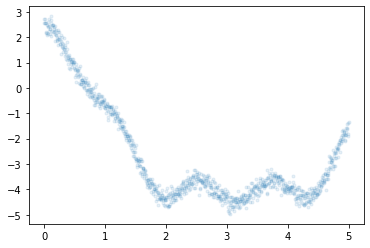

In [6]:
np.random.seed(43052)
t= np.linspace(0,5,1000)
y = -2+ 3*np.cos(t) + 1*np.cos(2*t) + 0.5*np.cos(5*t) + np.random.randn(1000)*0.2
plt.plot(t,y,'.',alpha=0.1)

tf.keras를 이용하여 $\beta_0,\dots,\beta_5$를 추정하라. ($\beta_0,\dots,\beta_5$의 참값은 각각 -2, 3, 1, 0, 0, 0.5 이다)

`(3)` 모형에 대한 설명 중 옳은 것을 모두 골라라. 

(하영) 이 모형의 경우 MSEloss를 최소화하는 $\hat{\beta}_0,\dots,\hat{\beta}_5$를 구하는것은 최대우도함수를 최대화하는 $\hat{\beta}_0,\dots,\hat{\beta}_5$를 구하는 것과 같다.

답 : 참

(재인) 하영의 말이 옳은 이유는 오차항이 정규분포를 따른다는 가정이 있기 때문이다.

답 : 참

(서연) 이 모형에서 적절한 학습률이 선택되더라도 경사하강법을 이용하면 MSEloss를 최소화하는 $\hat{\beta}_0,\dots,\hat{\beta}_5$를 종종 구할 수 없는 문제가 생긴다. 왜냐하면 손실함수가 convex하지 않아서 local minimum에 빠질 위험이 있기 때문이다.

답 : 참

(규빈) 만약에 경사하강법 대신 확률적 경사하강법을 쓴다면 local minimum을 언제나 탈출 할 수 있다. 따라서 서연이 언급한 문제점은 생기지 않는다.

답 : 거짓

`(4)` 다음은 아래 모형을 학습한 결과이다. 옳게 해석한 것을 모두 고르시오.

In [7]:
y = y.reshape(1000,1)
x1 = np.cos(t) 
x2 = np.cos(2*t)
x3 = np.cos(3*t)
x4 = np.cos(4*t)
x5 = np.cos(5*t)
X = tf.stack([x1,x2,x3,x4,x5],axis=1)

2022-06-13 19:35:01.615989: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero


In [8]:
net = tf.keras.Sequential()
net.add(tf.keras.layers.Dense(1)) 
net.compile(loss='mse',optimizer='adam')
net.fit(X,y,epochs=500,batch_size=100, validation_split=0.45,verbose=0)

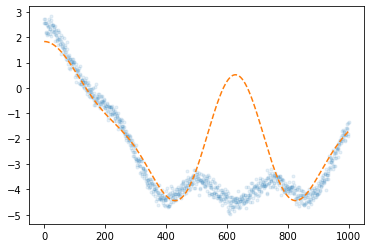

In [9]:
plt.plot(y,'.',alpha=0.1)
plt.plot(net(X),'--')

(재인) 처음 550개의 데이터만 학습하고 이후의 450개의 데이터는 학습하지 않고 validation으로 이용하였다.

답 : 거짓

(서연) validation에서의 적합결과가 좋지 않다.

답 : 참

(규빈) validation의 적합결과가 좋지 않기 때문에 오버피팅을 의심할 수 있다. 따라서 만약에 네트워크에 드랍아웃층을 추가한다면 오버피팅을 방지하는 효과가 있어 validation의 loss가 줄어들 것이다.

답 : 거짓

(하영) 이 모형의 경우 더 많은 epoch으로 학습한다면 train loss와 validation loss를 둘 다 줄일 수 있다.

답 : 참

`(5)` 다음을 잘 읽고 참 거짓을 판별하라. 
- Convolution은 선형변환이다.

답 : 참
- CNN을 이용하면 언제나 손실함수를 MSEloss로 선택해야 한다.

답 : 거짓
- CNN은 adam optimizer를 통해서만 최적화할 수 있다.

답 : 참
- 이미지자료는 CNN을 이용하여서만 분석할 수 있으며 DNN으로는 분석불가능하다.

답 : 거짓
- CNN은 칼라이미지일 경우에만 적용가능하다.

답 : 거짓